In [1]:
# First import of libraries
import numpy as np
import pandas as pd
from sklearn import datasets

# Second import of libraries
%matplotlib inline
import matplotlib.pyplot as plt

In [29]:
# Load database set
diabetes_dataset = datasets.load_diabetes(as_frame=True)
diabetes_X, diabetes_y = diabetes_dataset.data, diabetes_dataset.target 

# Describe Dataset
print(datasets.load_diabetes(as_frame=True).DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Text(0, 0.5, 'Diabetes Risk')

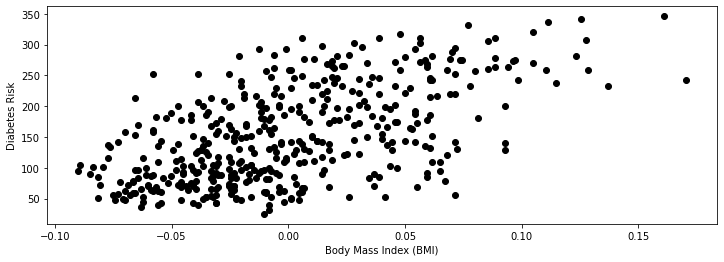

In [33]:
plt.rcParams["figure.figsize"] = [12, 4]

plt.scatter(diabetes_X.loc[:,"bmi"], diabetes_y, color="black")
plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Diabetes Risk")

## Linear Regression Solution (Only BMI)

In [16]:
# keep only BMI
diabetes_X_bmi = diabetes_X.loc[:, ["bmi"]].copy()

# The BMI is 0-centered. We recenter for ease of information
diabetes_X_bmi = diabetes_X_bmi * 30 + 25

# Collect 20 data points
diabetes_X_bmi_train = diabetes_X_bmi[-20:]
diabetes_y_train = diabetes_y[-20:]

# Display some of the data points
pd.concat([diabetes_X_train, diabetes_y_train], axis=1).head()

,bmi,target
422,27.335902,233.0
423,23.811456,91.0
424,25.331171,111.0
425,23.779122,152.0
426,23.973128,120.0


In [6]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [49]:
# Create Linear Regression object
regr_bmi = linear_model.LinearRegression()

# Train the model using the training set
regr_bmi.fit(diabetes_X_bmi_train, diabetes_y_train.values)

# Make Prediction on the training sets
diabetes_y_bmi_train_pred = regr_bmi.predict(diabetes_X_bmi_train)

print(f"Slope {regr_bmi.coef_[0]}")
print(f"Intercept {regr_bmi.intercept_}")
print(f"mean square error {mean_squared_error(diabetes_y_train, diabetes_y_bmi_train_pred)}")

Slope 37.378842160517664
Intercept -797.0817390342369
mean square error 2176.000908590763


Text(0, 0.5, 'Diabetes Risk')

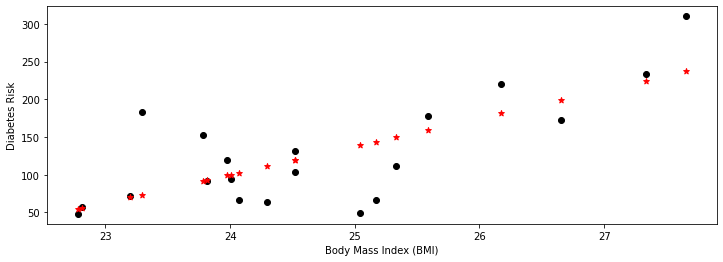

In [41]:
plt.scatter(diabetes_X_bmi_train, diabetes_y_train, color="black")
plt.scatter(diabetes_X_bmi_train, diabetes_y_train_pred, color="red", marker="*")
plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Diabetes Risk")

## Linear Regression Solution (All Features)

In [35]:
# Collect 20 data points
diabetes_X_train = diabetes_X[-20:]
diabetes_y_train = diabetes_y[-20:]

# Display some of the data points
pd.concat([diabetes_X_train, diabetes_y_train], axis=1).head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
422,-0.078165,0.050680,0.077863,0.052858,0.078236,0.064447,0.026550,-0.002592,0.040672,-0.009362,233.0
423,0.009016,0.050680,-0.039618,0.028758,0.038334,0.073529,-0.072854,0.108111,0.015567,-0.046641,91.0
424,0.001751,0.050680,0.011039,-0.019442,-0.016704,-0.003819,-0.047082,0.034309,0.024053,0.023775,111.0
425,-0.078165,-0.044642,-0.040696,-0.081414,-0.100638,-0.112795,0.022869,-0.076395,-0.020289,-0.050783,152.0
426,0.030811,0.050680,-0.034229,0.043677,0.057597,0.068831,-0.032356,0.057557,0.035462,0.085907,120.0


In [53]:
# Create regression object
regr = linear_model.LinearRegression()

# Train Model
regr.fit(diabetes_X_train, diabetes_y_train)

# Predict 
diabetes_y_train_predict = regr.predict(diabetes_X_train)

# Datapoints for test
diabetes_X_test = diabetes_X.iloc[:3]
diabetes_y_test = diabetes_y.iloc[:3]

# Predict Test
diabetes_y_test_predict = regr.predict(diabetes_X_test)

Text(0, 0.5, 'Diabetes Risk')

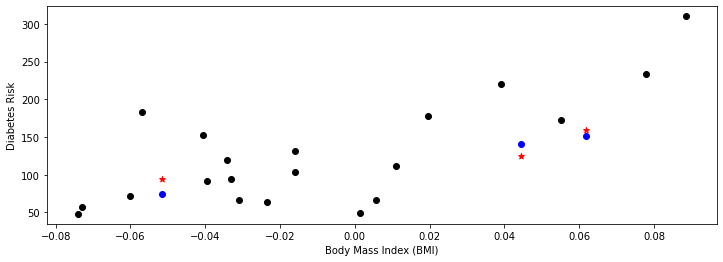

In [58]:
plt.scatter(diabetes_X_train.loc[:, "bmi"], diabetes_y_train, color="black")
plt.scatter(diabetes_X_test.loc[:, "bmi"], diabetes_y.iloc[:3], color="blue")
plt.scatter(diabetes_X_test.loc[:, "bmi"], diabetes_y_test_predict, color="red", marker="*")
plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Diabetes Risk")